In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-train/Cleaned_Train.csv
/kaggle/input/ml-train-dataset/ML_Train_Data.csv
/kaggle/input/ml-train-dataset/ML_Train_Data_V2.csv
/kaggle/input/test-data/Test.csv
/kaggle/input/v2-test/Cleaned_Test.csv
/kaggle/input/train-dataset/Train.csv


**Lets Drop one feature and find whether the accuracy score is decreasing or not**

In [33]:
import pandas as pd
Ml_Train=pd.read_csv('/kaggle/input/ml-train-dataset/ML_Train_Data.csv')
Ml_Train.head()

DetectorId  AlertTitle           Category        MitreTechniques  \
0           7           6      InitialAccess        T1078;T1078.004   
1          58          43       Exfiltration                  T1041   
2         423         298      InitialAccess                  T1189   
3           2           2  CommandAndControl      T1046;T1071;T1210   
4           9          74          Execution  T1559;T1106;T1059.005   

  EntityType EvidenceRole  Day      PartOfDay   IncidentGrade  
0         Ip      Related    4        Morning    TruePositive  
1       User     Impacted   14  Early Morning   FalsePositive  
2        Url      Related   13  Early Morning   FalsePositive  
3        Url      Related   10        Evening  BenignPositive  
4       User     Impacted   15  Early Morning    TruePositive

In [34]:
from sklearn import preprocessing 
a=['Category','MitreTechniques','EntityType','PartOfDay','IncidentGrade']
label_encoder = preprocessing.LabelEncoder() 
for i in a:
    Ml_Train[i]= label_encoder.fit_transform(Ml_Train[i]) 
    print(Ml_Train[i].unique())

[10  7  1  6 16  9  0  2 13  5 12  4  8 14 11 15 17  3 19 18]
[ 682  463  838 ... 1132   10 1082]
[15 32 31 21 27 19  5  2 11 22  6 20 24  7 26 29 30 28 12  0  4  3 23 14
  1 25  8 13 16  9 17 18 10]
[3 1 2 0 4]
[2 1 0]


In [ ]:
Features=Ml_Train.drop(['IncidentGrade','EvidenceRole'],axis=1)
Features.head()

In [ ]:
Target=Ml_Train['IncidentGrade']
Target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.3,random_state=42,stratify=Target)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.value_counts()

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)


ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier

# Initialize the models
#model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)


# Fit each model
#model_lr.fit(X_train_rus, y_train_rus)
model_dt.fit(X_train_rus, y_train_rus)
model_rf.fit(X_train_rus, y_train_rus)



In [ ]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    #"Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    #"Gradient Boosting": model_gb,
    #"K-Nearest Neighbors": model_knn,
    #"SGD Classifier": model_sgd,
    #"XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}:")
    
    # Predict on the test set 
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n" + "="*60 + "\n")


# Version 2

In [15]:
import pandas as pd
Ml_Train=pd.read_csv('/kaggle/input/eda-train/Cleaned_Train.csv')
Ml_Train.head()

OrgId  IncidentId  AlertId  DetectorId  AlertTitle           Category  \
0      0         612   123247           7           6      InitialAccess   
1     88         326   210035          58          43       Exfiltration   
2    809       58352   712507         423         298      InitialAccess   
3     92       32992   774301           2           2  CommandAndControl   
4    148        4359   188041           9          74          Execution   

         MitreTechniques   IncidentGrade EntityType EvidenceRole  ...  \
0        T1078;T1078.004    TruePositive         Ip      Related  ...   
1                  T1041   FalsePositive       User     Impacted  ...   
2                  T1189   FalsePositive        Url      Related  ...   
3      T1046;T1071;T1210  BenignPositive        Url      Related  ...   
4  T1559;T1106;T1059.005    TruePositive       User     Impacted  ...   

   Registry_Info  Application_Info OS_Info   Location_Info      Device_Ip  \
0   1631 635 860         2251 3421    5 66          6 3 31      27 160396   
1   1631 635 860         2251 3421    5 66  1445 10630 242  360606 160396   
2   1631 635 860         2251 3421    5 66  1445 10630 242   360606 68652   
3   1631 635 860         2251 3421    5 66  1445 10630 242      360606 13   
4   1631 635 860         2251 3421    5 66  1445 10630 242  360606 160396   

       File_Info Day Month  Year      PartOfDay  
0  289573 117668   4     6  2024        Morning  
1  289573 117668  14     6  2024  Early Morning  
2  289573 117668  13     6  2024  Early Morning  
3  289573 117668  10     6  2024        Evening  
4  289573 117668  15     6  2024  Early Morning  

[5 rows x 24 columns]

In [16]:
import pandas as pd
Ml_Test=pd.read_csv('/kaggle/input/v2-test/Cleaned_Test.csv')
Ml_Test.head()

OrgId  IncidentId  AlertId  DetectorId  AlertTitle           Category  \
0    657       11767    87199         524         563    LateralMovement   
1      3       91158   632273           2           2  CommandAndControl   
2    145       32247   131719        2932       10807    LateralMovement   
3    222       15294   917686           0           0      InitialAccess   
4    363        7615     5944          27          18          Discovery   

                   MitreTechniques   IncidentGrade         EntityType  \
0      T1021;T1047;T1105;T1569.002  BenignPositive               User   
1      T1046;T1030;T1071;T1071.001  BenignPositive            Machine   
2  T1021;T1027.002;T1027.005;T1105  BenignPositive            Process   
3                  T1078;T1078.004   FalsePositive  CloudLogonSession   
4                  T1087;T1087.002  BenignPositive               User   

  EvidenceRole  ...  Registry_Info  Application_Info OS_Info   Location_Info  \
0     Impacted  ...   1631 635 860         2251 3421    5 66  1445 10630 242   
1     Impacted  ...   1631 635 860         2251 3421     0 0  1445 10630 242   
2      Related  ...   1631 635 860         2251 3421    5 66  1445 10630 242   
3      Related  ...   1631 635 860         2251 3421    5 66  1445 10630 242   
4     Impacted  ...   1631 635 860         2251 3421    5 66  1445 10630 242   

       Device_Ip      File_Info Day Month  Year      PartOfDay  
0  360606 160396  289573 117668   4     6  2024          Night  
1  360606 160396  289573 117668   3     6  2024      Afternoon  
2  360606 160396          14 22   8     6  2024  Early Morning  
3  360606 160396  289573 117668  12     6  2024      Afternoon  
4  360606 160396  289573 117668   6     6  2024        Evening  

[5 rows x 24 columns]

In [17]:
Ml_Train=Ml_Train[['OrgId','DetectorId','AlertTitle','Category','MitreTechniques','EntityType','Day','PartOfDay','IncidentGrade']]
Ml_Train.head()

OrgId  DetectorId  AlertTitle           Category        MitreTechniques  \
0      0           7           6      InitialAccess        T1078;T1078.004   
1     88          58          43       Exfiltration                  T1041   
2    809         423         298      InitialAccess                  T1189   
3     92           2           2  CommandAndControl      T1046;T1071;T1210   
4    148           9          74          Execution  T1559;T1106;T1059.005   

  EntityType  Day      PartOfDay   IncidentGrade  
0         Ip    4        Morning    TruePositive  
1       User   14  Early Morning   FalsePositive  
2        Url   13  Early Morning   FalsePositive  
3        Url   10        Evening  BenignPositive  
4       User   15  Early Morning    TruePositive

In [18]:
Ml_Test=Ml_Test[['OrgId','DetectorId','AlertTitle','Category','MitreTechniques','EntityType','Day','PartOfDay','IncidentGrade']]


OrgId  DetectorId  AlertTitle           Category  \
0    657         524         563    LateralMovement   
1      3           2           2  CommandAndControl   
2    145        2932       10807    LateralMovement   
3    222           0           0      InitialAccess   
4    363          27          18          Discovery   

                   MitreTechniques         EntityType  Day      PartOfDay  \
0      T1021;T1047;T1105;T1569.002               User    4          Night   
1      T1046;T1030;T1071;T1071.001            Machine    3      Afternoon   
2  T1021;T1027.002;T1027.005;T1105            Process    8  Early Morning   
3                  T1078;T1078.004  CloudLogonSession   12      Afternoon   
4                  T1087;T1087.002               User    6        Evening   

    IncidentGrade  
0  BenignPositive  
1  BenignPositive  
2  BenignPositive  
3   FalsePositive  
4  BenignPositive

In [41]:
Ml_Test.to_csv("ML_Test_encode_V2.csv",index=False)

In [20]:
from sklearn import preprocessing 
a=['Category','MitreTechniques','EntityType','PartOfDay','IncidentGrade']
label_encoder = preprocessing.LabelEncoder() 
for i in a:
    Ml_Train[i]= label_encoder.fit_transform(Ml_Train[i]) 
    print(Ml_Train[i].unique())
    Ml_Test[i]= label_encoder.transform(Ml_Test[i]) 
    print(Ml_Test[i].unique())

[10  7  1  6 16  9  0  2 13  5 12  4  8 14 11 15 17  3 19 18]
[11  1 10  5 16  9  2  7 17  4 12  6 13  3  0 15  8 14 19]
[ 682  463  838 ... 1132   10 1082]
[ 375  470  682  722 1138  937  783  463 1076  206  866 1056 1099  777
  399 1079  564  654  812   92 1050 1077  771  659  471  683  668  583
  776  441  393  612  775  410  719  664  767  591  138  563  158  201
   80  608  752  952  925  485  617  284  413  817  843  876  957 1089
  845  886  920  468  553  196  944  713  712  531  624  348  931  518
 1106  979   70  963  649  709  936  469  911  202 1017   50  181   12
 1096 1054  863 1100  838 1078  557  505   39   87  846  686  560  926
  329  950  748  631 1128  839 1139  724   58  548  736 1015  124 1104
  971 1102  295 1041  532  864  346  688  960  610  674  956  977  315
  982  985  448  804 1105  562  480  924  559  458  740 1071  420 1038
  213  109 1037  976 1073  243  459 1025  431  707  140  813  901  405
  663  650  734  581   47  303  603  195  293  893 1140  508  

In [21]:
Ml_Train.head()

OrgId  DetectorId  AlertTitle  Category  MitreTechniques  EntityType  Day  \
0      0           7           6        10              682          15    4   
1     88          58          43         7              463          32   14   
2    809         423         298        10              838          31   13   
3     92           2           2         1              471          31   10   
4    148           9          74         6             1050          32   15   

   PartOfDay  IncidentGrade  
0          3              2  
1          1              1  
2          1              1  
3          2              0  
4          1              2

In [22]:
Ml_Test.head()

OrgId  DetectorId  AlertTitle  Category  MitreTechniques  EntityType  Day  \
0    657         524         563        11              375          32    4   
1      3           2           2         1              470          19    3   
3    222           0           0        10              682           7   12   
4    363          27          18         5              722          32    6   
5      0           0           0        10              682          32    6   

   PartOfDay  IncidentGrade  
0          4              0  
1          0              0  
3          0              1  
4          2              0  
5          3              2

In [27]:
Features=Ml_Train.drop('IncidentGrade',axis=1)
Features.head()

OrgId  DetectorId  AlertTitle  Category  MitreTechniques  EntityType  Day  \
0      0           7           6        10              682          15    4   
1     88          58          43         7              463          32   14   
2    809         423         298        10              838          31   13   
3     92           2           2         1              471          31   10   
4    148           9          74         6             1050          32   15   

   PartOfDay  
0          3  
1          1  
2          1  
3          2  
4          1

In [28]:
Target=Ml_Train['IncidentGrade']
Target

0          2
1          1
2          1
3          0
4          2
          ..
9465492    2
9465493    0
9465494    0
9465495    0
9465496    0
Name: IncidentGrade, Length: 9465497, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.3,random_state=42,stratify=Target)

In [30]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
import pickle

# Save the model to a file using Pickle
with open('Scale.pkl', 'wb') as file:
   pickle.dump(scaler, file)

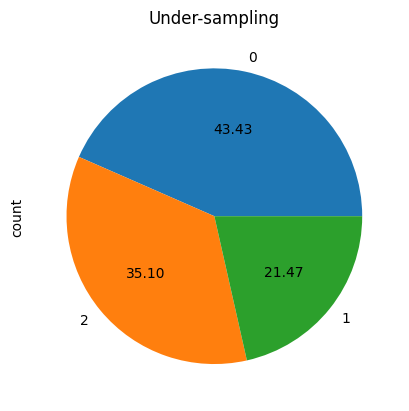

In [31]:
y_train.value_counts()

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [32]:
!pip install imbalanced-learn

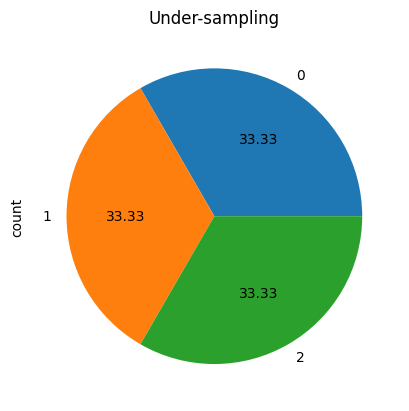

In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)


ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [34]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier

# Initialize the models
#model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)


# Fit each model
#model_lr.fit(X_train_rus, y_train_rus)
model_dt.fit(X_train_rus, y_train_rus)
model_rf.fit(X_train_rus, y_train_rus)



RandomForestClassifier(random_state=42)

In [37]:
import pickle

# Save the model to a file using Pickle
with open('Random_forest_model.pkl', 'wb') as file:
   pickle.dump(model_rf, file)

In [38]:
import pickle


# Save the model to a file using Pickle
with open('DecisionTree_model.pkl', 'wb') as file:
   pickle.dump(model_dt, file)

In [42]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    #"Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    #"Gradient Boosting": model_gb,
    #"K-Nearest Neighbors": model_knn,
    #"SGD Classifier": model_sgd,
    #"XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}:")
    
    # Predict on the test set 
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n" + "="*60 + "\n")

Evaluating Decision Tree:
Accuracy: 0.9809
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1233246
           1       0.96      0.98      0.97    609590
           2       0.98      0.98      0.98    996814

    accuracy                           0.98   2839650
   macro avg       0.98      0.98      0.98   2839650
weighted avg       0.98      0.98      0.98   2839650

Confusion Matrix:
[[1207640   13975   11631]
 [   5044  599601    4945]
 [   5814   12859  978141]]


Evaluating Random Forest:
Accuracy: 0.9663
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1233246
           1       0.93      0.97      0.95    609590
           2       0.97      0.97      0.97    996814

    accuracy                           0.97   2839650
   macro avg       0.96      0.97      0.96   2839650
weighted avg       0.97      0.97      0.97   2839650

Conf

**Lets check the Feature importance**

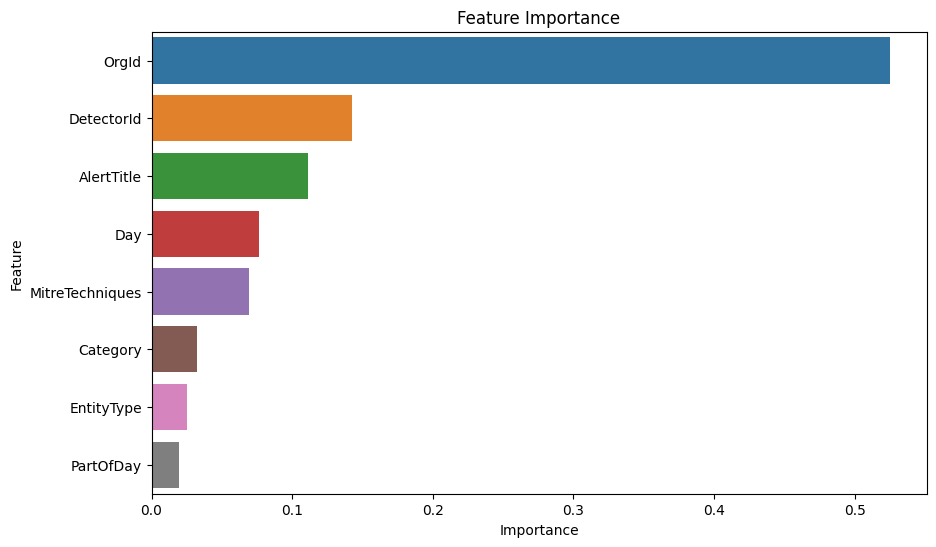

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


feature_importance = model_rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Lets Validate the Model's Performance**

In [44]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    #"Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    #"Gradient Boosting": model_gb,
    #"K-Nearest Neighbors": model_knn,
    #"SGD Classifier": model_sgd,
    #"XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Validating {name}:")
    
    # Predict on the train set 
    y_pred_val = model.predict(X_train_rus)
    
    # Accuracy Score
    acc = accuracy_score(y_train_rus,y_pred_val)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_train_rus,y_pred_val))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_train_rus,y_pred_val))
    
    print("\n" + "="*60 + "\n")

Validating Decision Tree:
Accuracy: 0.9865
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1422377
           1       0.98      0.99      0.99   1422377
           2       0.99      0.99      0.99   1422377

    accuracy                           0.99   4267131
   macro avg       0.99      0.99      0.99   4267131
weighted avg       0.99      0.99      0.99   4267131

Confusion Matrix:
[[1399984   11705   10688]
 [   7961 1406757    7659]
 [   5527   13991 1402859]]


Validating Random Forest:
Accuracy: 0.9865
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1422377
           1       0.98      0.99      0.99   1422377
           2       0.99      0.99      0.99   1422377

    accuracy                           0.99   4267131
   macro avg       0.99      0.99      0.99   4267131
weighted avg       0.99      0.99      0.99   4267131

Conf

In [45]:
Model=['Decision_Tree','Random_forest']
R2_Evalu=[0.98,0.96]
R2_validation=[0.98,0.98]

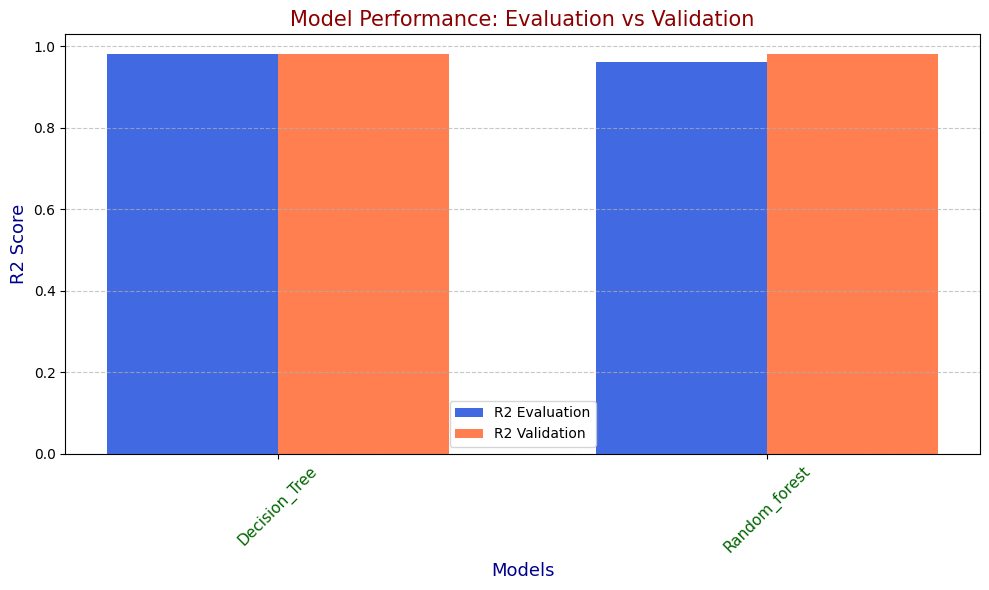

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the grouped bar chart
bar_width = 0.35
index = np.arange(len(Model))

plt.bar(index, R2_Evalu, width=bar_width, color='royalblue', label='R2 Evaluation')
plt.bar(index + bar_width, R2_validation, width=bar_width, color='coral', label='R2 Validation')

# Labeling the chart
plt.xlabel('Models', fontsize=13, color='darkblue')
plt.ylabel('R2 Score', fontsize=13, color='darkblue')
plt.title('Model Performance: Evaluation vs Validation', fontsize=15, color='darkred')

# Adding model names
plt.xticks(index + bar_width / 2, Model, rotation=45, fontsize=11, color='darkgreen')

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# ***NOW LETs TEST it in the actuall Test Data***

In [48]:
import pandas as pd
Ml_Test=pd.read_csv('/kaggle/input/final-evaluation/ML_Test_encode_V2.csv')
Ml_Test.head()

OrgId  DetectorId  AlertTitle  Category  MitreTechniques  EntityType  Day  \
0    657         524         563        11              375          32    4   
1      3           2           2         1              470          19    3   
2    222           0           0        10              682           7   12   
3    363          27          18         5              722          32    6   
4      0           0           0        10              682          32    6   

   PartOfDay  IncidentGrade  
0          4              0  
1          0              0  
2          0              1  
3          2              0  
4          3              2

In [49]:
Ml_Test.head()

OrgId  DetectorId  AlertTitle  Category  MitreTechniques  EntityType  Day  \
0    657         524         563        11              375          32    4   
1      3           2           2         1              470          19    3   
2    222           0           0        10              682           7   12   
3    363          27          18         5              722          32    6   
4      0           0           0        10              682          32    6   

   PartOfDay  IncidentGrade  
0          4              0  
1          0              0  
2          0              1  
3          2              0  
4          3              2

In [50]:
import pickle
import pandas as pd

# Load the scaler (assuming it is a scaler like StandardScaler or MinMaxScaler)
with open('/kaggle/input/final-evaluation/Scale.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [51]:
Target=Ml_Test['IncidentGrade']

In [52]:
features =Ml_Test[['OrgId','DetectorId','AlertTitle','Category','MitreTechniques','EntityType','Day','PartOfDay']] 
X_test_scaled = scaler.transform(features)
print(X_test_scaled)

[[ 1.27816384  0.99749158 -0.20265518 ...  1.37217459 -0.94150562
   1.44118819]
 [-0.46652772 -0.24936751 -0.25409691 ... -0.14027948 -1.10370522
  -1.20422702]
 [ 0.11770386 -0.25414475 -0.2542803  ... -1.53639094  0.35609121
  -1.20422702]
 ...
 [-0.34914786 -0.11799347 -0.2516211  ... -0.60564997  0.84269002
  -0.54287322]
 [-0.28779021 -0.25175613 -0.25418861 ...  0.20874838  0.19389161
   0.11848059]
 [ 0.13104248 -0.25175613 -0.25418861 ...  0.20874838 -0.94150562
   0.11848059]]


In [53]:
import pickle
import pandas as pd

with open('/kaggle/input/final-evaluation/Random_forest_model.pkl', 'rb') as f:
    Model = pickle.load(f)

In [54]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with the trained model
y_pred = Model.predict(X_test_scaled)

# Calculate accuracy
print("Random Forest Model")
accuracy = accuracy_score(Target, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Print classification report
report = classification_report(Target, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(Target, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Random Forest Model
Accuracy Score: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93   1751475
           1       0.84      0.89      0.86    902345
           2       0.94      0.91      0.92   1492221

    accuracy                           0.91   4146041
   macro avg       0.90      0.91      0.91   4146041
weighted avg       0.92      0.91      0.92   4146041

Confusion Matrix:
 [[1631830   72511   47134]
 [  57938  799102   45305]
 [  51716   78625 1361880]]


In [55]:
import pickle
import pandas as pd

with open('/kaggle/input/final-evaluation/DecisionTree_model.pkl', 'rb') as f:
    Model_1 = pickle.load(f)

In [56]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with the trained model
y_pred = Model_1.predict(X_test_scaled)

# Calculate accuracy
print("Decision Tree Model")
accuracy = accuracy_score(Target, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Print classification report
report = classification_report(Target, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(Target, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Decision Tree Model
Accuracy Score: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95   1751475
           1       0.88      0.90      0.89    902345
           2       0.94      0.95      0.94   1492221

    accuracy                           0.93   4146041
   macro avg       0.93      0.93      0.93   4146041
weighted avg       0.93      0.93      0.93   4146041

Confusion Matrix:
 [[1646692   60337   44446]
 [  42520  815115   44710]
 [  28422   51618 1412181]]


> ***So the Two model are Performing well Since the Decision tree accuracy, F1 score and the True positive score is also higer than the Random Forest Model.***